<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/HousePrice_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
pip install -q seaborn

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [68]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [69]:
raw=pd.read_csv('/content/housePrice.csv')

class_names=list(raw.columns)
class_names

['Area',
 'Room',
 'Parking',
 'Warehouse',
 'Elevator',
 'Address',
 'Price',
 'Price(USD)']

In [70]:
raw.isna().sum()# have 23 nan values

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [71]:
dataset = raw.dropna()# remove nan values
dataset

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [72]:
dataset.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [73]:
dataset=dataset.drop("Price(USD)",axis=1)

In [74]:
dataset=dataset[dataset.Area.apply(lambda x: x.isnumeric())]

In [75]:
dataset

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1.850000e+09
1,60,1,True,True,True,Shahran,1.850000e+09
2,79,2,True,True,True,Pardis,5.500000e+08
3,95,2,True,True,True,Shahrake Qods,9.025000e+08
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09
3475,83,2,True,True,True,Niavaran,6.800000e+09
3476,75,2,False,False,False,Parand,3.650000e+08
3477,105,2,True,True,True,Dorous,5.600000e+09


In [76]:
#dataset["Price"]=dataset["Price"]/max(dataset["Price"])

In [77]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

transformer = make_column_transformer(
    (MinMaxScaler(), 
        ['Area']),
    (OneHotEncoder(handle_unknown='ignore'), 
        ['Room', 'Parking', 'Warehouse', 
         'Elevator', 'Address'])
)

In [125]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Price', axis=1)
y = dataset['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [126]:
X_train

,Area,Room,Parking,Warehouse,Elevator,Address
74,63,1,True,True,True,Punak
49,60,1,True,True,True,Abbasabad
2528,85,2,True,True,True,Pardis
2962,41,1,False,False,True,Si Metri Ji
815,125,3,True,True,True,Punak
...,...,...,...,...,...,...
1101,50,1,True,True,True,Ostad Moein
1138,135,3,True,True,True,Qasr-od-Dasht
1302,68,2,True,True,True,North Program Organization
866,77,2,True,True,True,Gheitarieh


In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2760, 6), (690, 6), (2760,), (690,))

In [80]:
# Fit
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [81]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [82]:
import tensorflow as tf


In [116]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1,activation="relu")
])


In [117]:
model1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

In [100]:
model1.summary()

ValueError: ignored

In [118]:
history=model1.fit(X_train,y_train,epochs=500)

Epoch 1/500
87/87 [==============================] - 1s 3ms/step - loss: 5284426240.0000 - mae: 5284426240.0000
Epoch 2/500
87/87 [==============================] - 0s 3ms/step - loss: 5284426240.0000 - mae: 5284426240.0000
Epoch 3/500
87/87 [==============================] - 0s 3ms/step - loss: 5284423680.0000 - mae: 5284423680.0000
Epoch 4/500
87/87 [==============================] - 0s 3ms/step - loss: 5284421120.0000 - mae: 5284421120.0000
Epoch 5/500
87/87 [==============================] - 0s 2ms/step - loss: 5284412416.0000 - mae: 5284412416.0000
Epoch 6/500
87/87 [==============================] - 0s 3ms/step - loss: 5284400640.0000 - mae: 5284400640.0000
Epoch 7/500
87/87 [==============================] - 0s 3ms/step - loss: 5284386304.0000 - mae: 5284386304.0000
Epoch 8/500
87/87 [==============================] - 0s 3ms/step - loss: 5284363776.0000 - mae: 5284363776.0000
Epoch 9/500
87/87 [==============================] - 0s 3ms/step - loss: 5284334592.0000 - mae: 52843345

In [119]:
model1.evaluate(X_test,y_test)

22/22 [==============================] - 0s 2ms/step - loss: 4072360960.0000 - mae: 4072360960.0000


[4072360960.0, 4072360960.0]

In [120]:
predictions = model1.predict(X_test)
predictions[:10]

array([[2.867e+09],
       [2.967e+09],
       [2.949e+09],
       [2.549e+09],
       [2.762e+09],
       [2.912e+09],
       [2.705e+09],
       [2.674e+09],
       [2.901e+09],
       [2.297e+09]], dtype=float32)

In [124]:
y_test

1459    2.600000e+09
52      1.000000e+10
568     2.970000e+10
1622    1.650000e+09
1172    1.585000e+09
            ...     
723     3.300000e+09
2727    2.600000e+08
583     5.395000e+10
2638    7.100000e+08
2901    2.500000e+09
Name: Price, Length: 690, dtype: float64

In [123]:
len(predictions),len(y_test)

(690, 690)

In [108]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=predictions)

In [110]:
mae[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([5.680e+09, 5.680e+09, 5.681e+09, 5.681e+09, 5.680e+09, 5.679e+09,
       5.680e+09, 5.680e+09, 5.680e+09, 5.686e+09], dtype=float32)>

In [112]:
import matplotlib.pyplot as plt

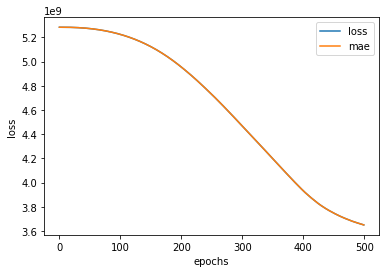

In [121]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");